**📌 一、PR 曲线是什么？**

**PR 曲线是以：**

* 横轴：Recall（召回率 / True Positive Rate）
* 纵轴：Precision（精确率）

绘制的曲线，反映模型在不同 阈值（threshold）下的性能。

它强调模型对“**正类识别的能力**”以及“**正类预测的准确性**”。





**📘 二、PR 曲线中的两个关键指标**

| 名称                 | 公式             | 含义（通俗解释）              |
| ------------------ | -------------- | --------------------- |
| **精确率（Precision）** | TP / (TP + FP) | 被预测为正类的样本中，有多少是真正的正类  |
| **召回率（Recall）**    | TP / (TP + FN) | 所有真实正类中，有多少被模型正确预测为正类 |

**例子直观理解：**

假设模型预测了 10 个为正类，实际上只有 6 个是真正的正类：

* Precision = 6 / 10 = 0.6（准确度）
* 如果实际正类有 8 个，而模型只抓住了 6 个：

  * Recall = 6 / 8 = 0.75（覆盖率）





**🧠 三、PR 曲线如何绘制？**

1. 模型输出的是概率（不是直接的0或1），比如“这个交易是欺诈的概率为 0.9”。
2. 改变阈值（从1到0逐渐降低），每个阈值下你可以计算出一个 `(Recall, Precision)` 点。
3. 将这些点连接起来，就形成了 PR 曲线。







**🎯 五、PR 曲线下面积：Average Precision（AP）**

PR 曲线下的面积就是：

> **AP（Average Precision）**

它可以看成是 PR 曲线的“加权平均”，用于整体上衡量模型的表现：

* AP ≈ 越接近 1，说明模型越优秀
* AP ≈ 正类比例时，说明模型很差




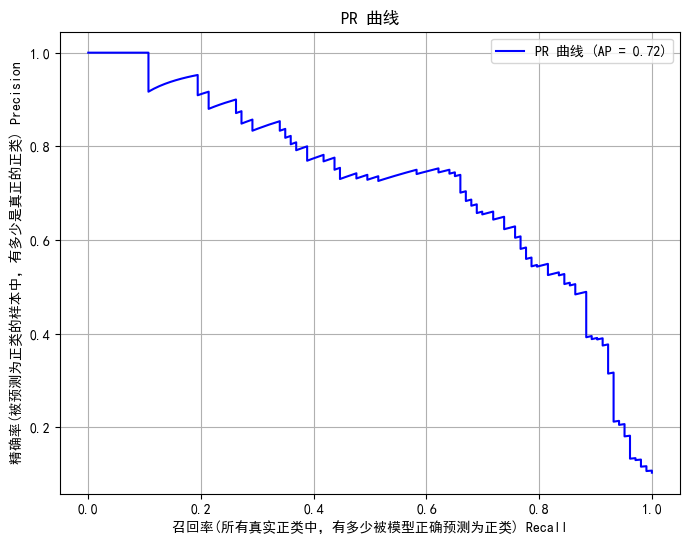

In [4]:


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.rcParams['font.family'] = 'SimHei'        # 设置中文字体（黑体）
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# **模拟不平衡数据**
X, y = make_classification(n_samples=1000, n_classes=2,
                           weights=[0.9, 0.1],  # 不平衡
                           n_features=20, random_state=42)

model = LogisticRegression()
model.fit(X, y)
y_probs = model.predict_proba(X)[:, 1]

# **计算 PR 曲线**
precision, recall, thresholds = precision_recall_curve(y, y_probs)
ap = average_precision_score(y, y_probs)

# **绘图**
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR 曲线 (AP = {ap:.2f})', color='blue')
plt.xlabel('召回率(所有真实正类中，有多少被模型正确预测为正类) Recall')
plt.ylabel('精确率(被预测为正类的样本中，有多少是真正的正类) Precision')
plt.title('PR 曲线')
plt.legend()
plt.grid(True)
plt.show()

 
